## keras Sequential

In [1]:
from tensorflow import keras
from tensorflow.keras import layers, losses, metrics, optimizers, activations

In [2]:
model = keras.Sequential([
    layers.Dense(64, activation=activations.relu),
    layers.Dense(10, activation=activations.softmax)
])

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2023-08-03 14:09:15.691766: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-03 14:09:15.691919: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
# The add() method can be used to append Sequential layers

model = keras.Sequential()

model.add(layers.Dense(64, activation=activations.relu))
model.add(layers.Dense(10, activation=activations.softmax))

In [4]:
try:
    print(model.weights == None)
except ValueError as ve:
    print(ve)

model.build(input_shape=(None, 3))

try:
    print(model.weights == None)
except ValueError as ve:
    print(ve)

Weights for model sequential_1 have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.
False


In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Naming models and layers

model = keras.Sequential(name='my_example_model')

model.add(layers.Dense(64, activation=activations.relu, name='my_first_layer'))
model.add(layers.Dense(10, activation=activations.softmax, name='my_second_layer'))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_second_layer (Dense)     (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Keras Input class can be used to build Sequential Models automatically

model = keras.Sequential(name='my_second_model')
model.add(layers.Input(shape=(3,), name='my_input_layer'))
model.add(layers.Dense(64, activation=activations.relu, name='my_first_layer'))
model.add(layers.Dense(10, activation=activations.softmax, name='my_second_layer'))
model.summary()

Model: "my_second_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_second_layer (Dense)     (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


## keras Functional

In [8]:
inputs = keras.Input(shape=(3,), name='my_input') # Symbolic tensor: does not hold any real values
features = layers.Dense(64, activation=activations.relu)(inputs) # Layer built on a symbolic tensor also returns a symbolic tensor
outputs = layers.Dense(10, activation=activations.relu)(features)

model = keras.Model(inputs=inputs, outputs=outputs)

In [9]:
print(inputs.shape, inputs.dtype)

(None, 3) <dtype: 'float32'>


In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Multi-input, Multi-output Functional model
# Context: Ranking and allocating customer support tickets to specific departments based on ticket title, body and category tags

vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags = keras.Input(shape=(num_tags,), name='tags')

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation=activations.relu)(features)

priority = layers.Dense(1, activation=activations.sigmoid, name='priority')(features)
department = layers.Dense(num_departments, activation=activations.softmax, name='department')(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

In [12]:
import numpy as np 

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer=optimizers.RMSprop(),
              loss={'priority': losses.MeanSquaredError(),                            # Specifying which loss to use with which layers
                    'department': losses.CategoricalCrossentropy()},
              metrics={'priority': metrics.MeanAbsoluteError(), 
                       'department' :metrics.CategoricalAccuracy()})

model.fit({'title': title_data, 
           'text_body': text_body_data, 
           'tags': tags_data},
          {'priority': priority_data, 
           'department': department_data},
          epochs=1)

model.evaluate({'title': title_data, 
                'text_body': text_body_data, 
                'tags': tags_data},
                {'priority': priority_data, 
                'department': department_data})

priority_preds, department_preds = model.predict({'title': title_data,
                                                  'text_body': text_body_data, 
                                                  'tags': tags_data})

2023-08-03 14:09:16.078951: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-08-03 14:09:16.398761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/40 [=======>......................] - ETA: 0s - loss: 119.6533 - priority_loss: 0.3125 - department_loss: 119.3408 - priority_mean_absolute_error: 0.4757 - department_categorical_accuracy: 0.1364

2023-08-03 14:09:17.280693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 10ms/step - loss: 125.5836 - priority_loss: 0.3408 - department_loss: 125.2428 - priority_mean_absolute_error: 0.5041 - department_categorical_accuracy: 0.1195


2023-08-03 14:09:17.818049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


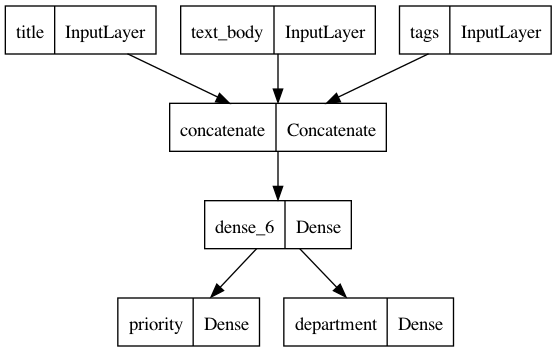

In [13]:
keras.utils.plot_model(model, 'ticket_classifier.png')

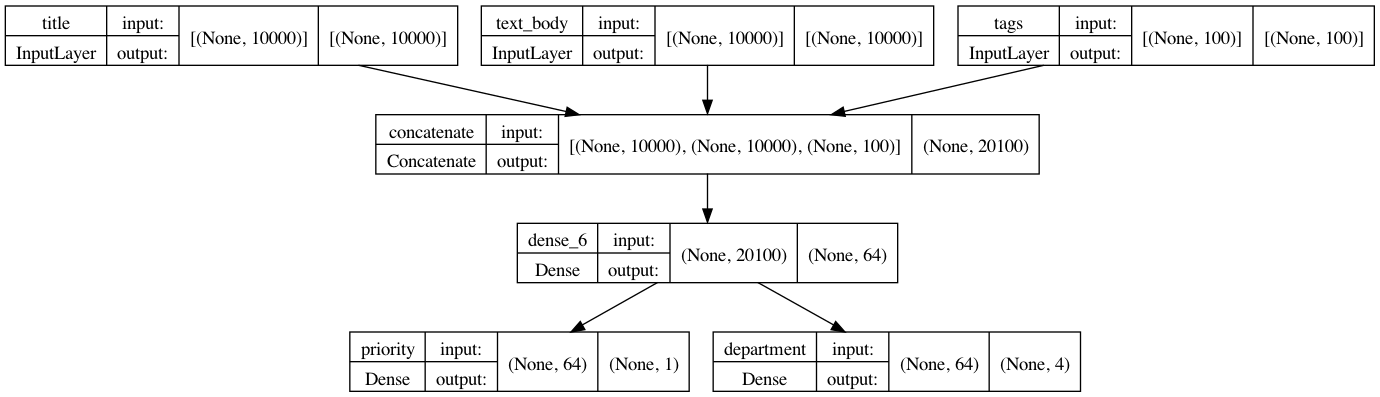

In [14]:
keras.utils.plot_model(model, 'ticket_classifier_with_shape_info.png', show_shapes=True)


### Access to Layer Connectivity

In [15]:
model.layers

In [16]:
model.layers[3]

In [17]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [18]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

In [19]:
# Feature Extraction: We want to add another output to the previous model, to categorize a ticket into 'easy', 'medium', or 'hard'
# We no longer need to train the model from scratch, we can start from the intermediate features of the previous model

features = model.layers[4].output # Intermediate Dense layer output

difficulty = layers.Dense(3, activation=activations.softmax, name='difficulty')(features)

new_model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department, difficulty])

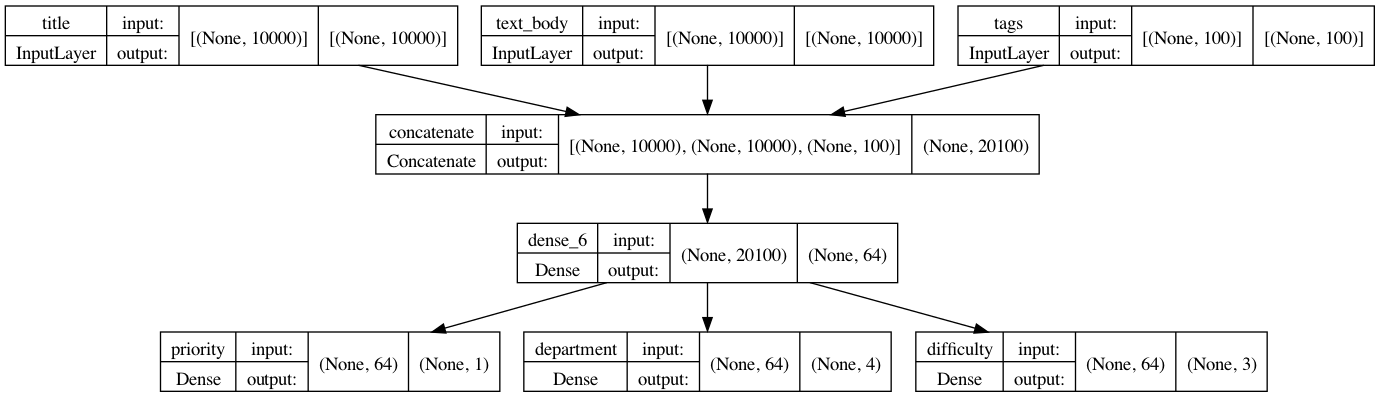

In [20]:
keras.utils.plot_model(new_model, 'updated_ticket_classifier.png', show_shapes=True)

## Model Subclassing

In [21]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation=activations.relu)
        self.priority_scorer = layers.Dense(1, activation=activations.sigmoid)
        self.department_classifier = layers.Dense(num_departments, activation=activations.softmax)

    def call(self, inputs):
        title = inputs['title']
        text_body = inputs['text_body']
        tags = inputs['tags']

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)

        return priority, department


In [22]:
model = CustomerTicketModel(num_departments=4)

priority, department = model({'title': title_data,
                              'text_body': text_body_data,
                              'tags': tags_data})

In [23]:
model.compile(optimizer=optimizers.RMSprop(),
              loss=[losses.MeanSquaredError(), losses.CategoricalCrossentropy()],
              metrics=[[metrics.MeanAbsoluteError()], [metrics.CategoricalAccuracy()]])

model.fit({'title': title_data,
           'text_body': text_body_data,
           'tags': tags_data},
           [priority_data, department_data], 
           epochs=1)

model.evaluate({'title': title_data,
                'text_body': text_body_data,
                'tags': tags_data},
                [priority_data, department_data])

priority_preds, department_preds = model.predict({'title': title_data,
                                                  'text_body': text_body_data,
                                                  'tags': tags_data})

 1/40 [..............................] - ETA: 17s - loss: 3.5077 - output_1_loss: 0.0762 - output_2_loss: 3.4315 - output_1_mean_absolute_error: 0.2289 - output_2_categorical_accuracy: 0.2188

2023-08-03 14:09:19.091877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/40 [========>.....................] - ETA: 0s - loss: 75.5698 - output_1_loss: 0.3167 - output_2_loss: 75.2531 - output_1_mean_absolute_error: 0.4782 - output_2_categorical_accuracy: 0.0547

2023-08-03 14:09:19.952301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 10ms/step - loss: 78.4604 - output_1_loss: 0.3408 - output_2_loss: 78.1196 - output_1_mean_absolute_error: 0.5041 - output_2_categorical_accuracy: 0.0633


2023-08-03 14:09:20.480129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [24]:
model.summary()

Model: "customer_ticket_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 concatenate_1 (Concatenate)  multiple                 0         
                                                                 
 dense_7 (Dense)             multiple                  1286464   
                                                                 
 dense_8 (Dense)             multiple                  65        
                                                                 
 dense_9 (Dense)             multiple                  260       
                                                                 
Total params: 1,286,789
Trainable params: 1,286,789
Non-trainable params: 0
_________________________________________________________________


### Interoperability between Subclassed and Functional/Sequential models

In [25]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()

        if num_classes == 2:
            num_units = 1
            activation = activations.sigmoid
        else:
            num_units = num_classes
            activation = activations.softmax
        
        self.dense = layers.Dense(num_units, activation=activation)
    
    def call(self, inputs):
        return self.dense(inputs)

In [26]:
inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation=activations.relu)(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [27]:
class MyModel(keras.Model):

    def __init__(self, classifier):
        super().__init__()
        self.dense = layers.Dense(64, activation=activations.relu)
        self.classifier = classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

In [28]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation=activations.sigmoid)(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)
model = MyModel(classifier=binary_classifier)

## Training Paradigm: (built-in) Compile-Fit-Evaluate-Predict

In [29]:
from tensorflow.keras.datasets import mnist

In [30]:
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation=activations.relu, name='Dense1')(inputs)
    features = layers.Dropout(0.5, name='Dropout1')(features)
    outputs = layers.Dense(10, activation=activations.softmax, name='output')(features)
    model = keras.Model(inputs, outputs)

    return model

In [31]:
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype(np.float32) / 255. 
test_images = test_images.reshape((10000, 28 * 28)).astype(np.float32) / 255. 
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.SparseCategoricalCrossentropy(),
              metrics=[metrics.SparseCategoricalAccuracy()])
model.fit(train_images, 
          train_labels, 
          epochs=3, 
          validation_data=(val_images, val_labels),
          verbose=0)

test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)


2023-08-03 14:09:21.198769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-03 14:09:31.004636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 5ms/step - loss: 0.1104 - sparse_categorical_accuracy: 0.9716


2023-08-03 14:09:55.423457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [32]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 Dense1 (Dense)              (None, 512)               401920    
                                                                 
 Dropout1 (Dropout)          (None, 512)               0         
                                                                 
 output (Dense)              (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Custom Metrics

In [33]:
import tensorflow as tf

In [34]:
class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name='rmse', **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name='mse_sum', initializer='zeros')
        self.total_samples = self.add_weight(name='total_samples', initializer='zeros', dtype='int32')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)
    
    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))
    
    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [35]:
model = get_mnist_model()
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.SparseCategoricalCrossentropy(),
              metrics=[metrics.SparseCategoricalAccuracy(), RootMeanSquaredError()])
model.fit(train_images, 
          train_labels, 
          epochs=3, 
          validation_data=(val_images, val_labels),
          verbose=0)

test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

2023-08-03 14:09:56.487617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-03 14:10:06.632788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.1077 - sparse_categorical_accuracy: 0.9718 - rmse: 7.4319


2023-08-03 14:10:32.027198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


## Callbacks

In [36]:
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=2),
                  keras.callbacks.ModelCheckpoint(filepath='checkpoint_path.keras', monitor='val_loss', save_best_only=True)]

model = get_mnist_model()
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.SparseCategoricalCrossentropy(),
              metrics=[metrics.SparseCategoricalAccuracy()])
model.fit(train_images,
          train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels), 
          verbose=0)

2023-08-03 14:10:32.704124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-03 14:10:42.534636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [37]:
model = keras.models.load_model('checkpoint_path.keras')

### Custom Callbacks

In [38]:
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [39]:
class LossHistory(keras.callbacks.Callback):

    def on_train_begin(self, logs):
        self.pdf = PdfPages('C7.3.3: Epoch-wise loss plots.pdf')
        self.per_batch_losses = []
    
    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get('loss'))

    def on_epoch_end(self, epoch, logs):
        fig = plt.figure()
        plt.plot(range(len(self.per_batch_losses)),
                 self.per_batch_losses,
                 label='Training loss for each batch')
        plt.xlabel(f'Batch (epoch {epoch})')
        plt.ylabel('Loss')
        plt.legend()
        self.pdf.savefig(fig)
        self.per_batch_losses = []
    
    def on_train_end(self, logs):
        self.pdf.close()

2023-08-03 14:12:21.076191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-03 14:12:32.281199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


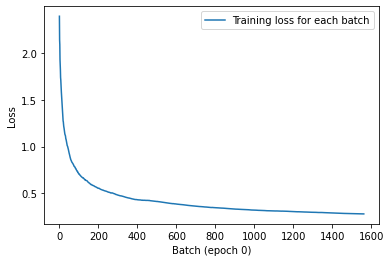

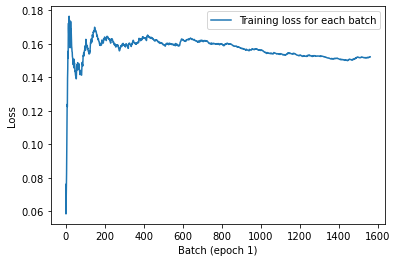

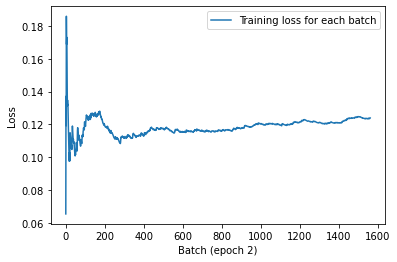

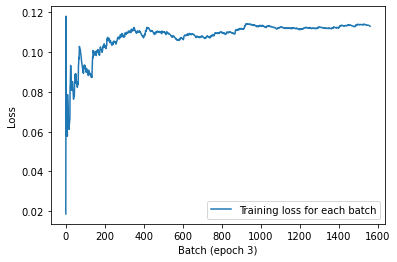

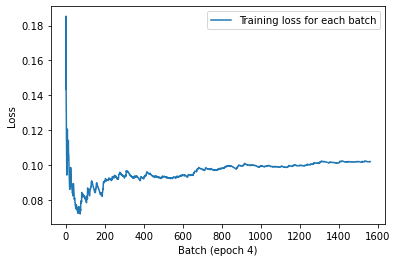

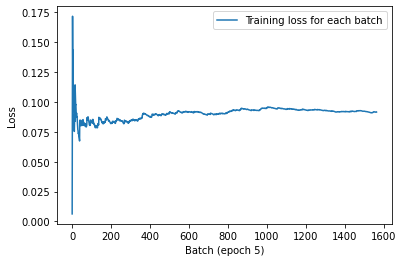

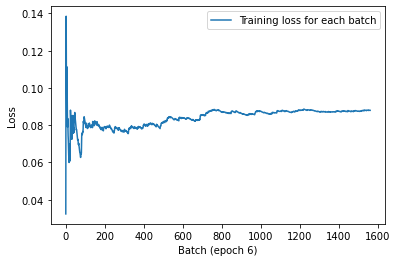

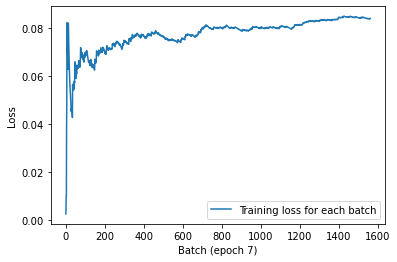

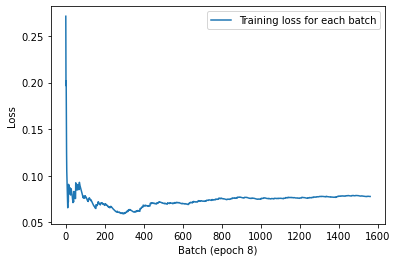

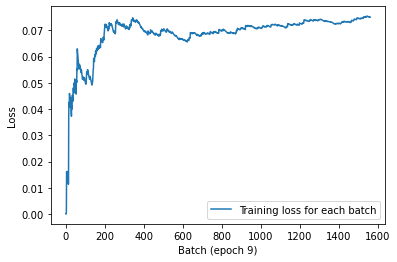

In [40]:
model = get_mnist_model()
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.SparseCategoricalCrossentropy(),
              metrics=[metrics.SparseCategoricalAccuracy()])
model.fit(train_images, 
          train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels),
          verbose=0)

## Tensorboard

In [41]:
model = get_mnist_model()
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.SparseCategoricalCrossentropy(),
              metrics=[metrics.SparseCategoricalAccuracy()])

tensorboard = keras.callbacks.TensorBoard(log_dir='/Users/suprateembanerjee/Python Projects/DL With Python/logs')

model.fit(train_images, 
          train_labels,
          epochs=10,
          callbacks=[tensorboard],
          validation_data=(val_images, val_labels),
          verbose=0)

2023-08-03 14:14:22.355599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-03 14:14:32.091982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


## Re-implementing fit()

Custom training and evaluation loops are sometimes required to perform un/semi-supervised/reinforcement learning. Here we will reimplement the fit() method to understand the workings of trainable/non-trainable weights, among others.

In [42]:
@tf.function # Instead of eager execution, we compile tensorflow code into a computational graph to make it much more performant (3x in this case)
def train_step(inputs, targets, model, optimizer, loss_function, tracking_metrics, loss_tracking_metric):
    
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_function(targets, predictions)
    
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}

    for metric in tracking_metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs['loss'] = loss_tracking_metric.result()

    return logs

In [43]:
def reset_metrics(tracking_metrics, loss_tracking_metric):
    for metric in tracking_metrics:
        metric.reset_state()
        loss_tracking_metric.reset_state()

In [44]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))  # Create a tensorflow dataset out of the training data
training_dataset = training_dataset.batch(32)                                        # Batch the training data
epochs = 3
optimizer=optimizers.RMSprop()
loss_function=losses.SparseCategoricalCrossentropy()
tracking_metrics=[keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric=metrics.Mean()

model = get_mnist_model()

# Training Loop

for epoch in range(epochs):
    reset_metrics(tracking_metrics=tracking_metrics, loss_tracking_metric=loss_tracking_metric)
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch, model, optimizer, loss_function, tracking_metrics, loss_tracking_metric)
    
    print(f'Results at the end of epoch {epoch}')
    for key, value in logs.items():
        print(f'...{key} : {value:.4f}')

2023-08-03 14:16:10.348152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-03 14:16:17.001408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Results at the end of epoch 0
...sparse_categorical_accuracy : 0.9200
...loss : 0.2719
Results at the end of epoch 1
...sparse_categorical_accuracy : 0.9656
...loss : 0.1229
Results at the end of epoch 2
...sparse_categorical_accuracy : 0.9798
...loss : 0.0782


In [45]:
@tf.function
def test_step(inputs, targets, model, loss_function, tracking_metrics, loss_tracking_metric):
    predictions = model(inputs, training=False)
    loss = loss_function(targets, predictions)

    logs = {}
    for metric in tracking_metrics:
        metric.update_state(targets, predictions)
        logs[f'val_{metric.name}'] = metric.result()
    loss_tracking_metric.update_state(loss)
    logs['val_loss'] = loss_tracking_metric.result()

    return logs

In [46]:
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics(tracking_metrics=tracking_metrics, loss_tracking_metric=loss_tracking_metric)

for input_batch, target_batch in val_dataset:
    logs = test_step(input_batch, target_batch, model, loss_function, tracking_metrics, loss_tracking_metric)

print('Evaluation results:')
for key, value in logs.items():
    print(f'...{key}: {value:.4f}')

2023-08-03 14:16:30.270797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Evaluation results:
...val_sparse_categorical_accuracy: 0.9627
...val_loss: 0.1589


2023-08-03 14:16:31.143744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Here we just implemented a training loop from scratch. This allows for more flexiblity, but prohibits us from using useful fit methodologies such as distributed training or callbacks. A middle ground is to override training_step() inside a model class. The custom logic gets called by fit().

#### Using pre-set loss and tracker

In [47]:
class CustomModel(keras.Model):

    def set_params(self,
                 loss_function=losses.SparseCategoricalCrossentropy(), 
                 loss_tracker=metrics.Mean(name='loss')):
        self.loss_function = loss_function
        self.loss_tracker = loss_tracker
    
    def train_step(self, data):
        inputs, targets = data 

        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.loss_function(targets, predictions)
            gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.loss_tracker.update_state(loss)

        return {'loss': self.loss_tracker.result()}
    
    @property
    def metrics(self):
        return [self.loss_tracker]

In [48]:
inputs = keras.Input(shape=(28 * 28))
features = layers.Dense(512, activation=activations.relu)(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation=activations.softmax)(features)
model = CustomModel(inputs, outputs)
model.set_params()

model.compile(optimizer=optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3, verbose=0)

2023-08-03 14:16:31.383181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


#### Using Compiled metrics, optimizer, loss

In [49]:
class CustomModel2(keras.Model):
    
    def train_step(self, data):
        inputs, targets = data 

        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
            gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)

        return {m.name: m.result() for m in self.metrics}

In [50]:
inputs = keras.Input(shape=(28 * 28))
features = layers.Dense(512, activation=activations.relu)(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation=activations.softmax)(features)
model = CustomModel2(inputs, outputs)

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.SparseCategoricalCrossentropy(),
              metrics=[metrics.SparseCategoricalCrossentropy()])

model.fit(train_images, train_labels, epochs=3, verbose=0)

2023-08-03 14:16:55.760310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
